# Visualising Distributions of Data

In this section, we will see how to: 
- Visualise univariate distributions
- Visualise bivariate distributions

We will also start using the ```seaborn``` library for data visualisation. Seaborn is a python library built on top of ```matplotlib```. It creates much more attractive plots than ```matplotlib```, and is often more concise than ```matplotlib``` when you want to customize your plots, add colors, grids etc.

Let's start with univariate distributions.

## Visualising Univariate Distributions

We have already visualised univariate distributions before using boxplots, histograms etc. Let's now do that using seaborn. We'll use the sales data for the upcoming few exercises.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

# data
df = pd.read_csv("./global_sales_data/market_fact.csv")
df.head()

,Ord_id,Prod_id,Ship_id,Cust_id,Sales,Discount,Order_Quantity,Profit,Shipping_Cost,Product_Base_Margin
0,Ord_5446,Prod_16,SHP_7609,Cust_1818,136.81,0.01,23,-30.51,3.60,0.56
1,Ord_5406,Prod_13,SHP_7549,Cust_1818,42.27,0.01,13,4.56,0.93,0.54
2,Ord_5446,Prod_4,SHP_7610,Cust_1818,4701.69,0.00,26,1148.90,2.50,0.59
3,Ord_5456,Prod_6,SHP_7625,Cust_1818,2337.89,0.09,43,729.34,14.30,0.37
4,Ord_5485,Prod_17,SHP_7664,Cust_1818,4233.15,0.08,35,1219.87,26.30,0.38


### Histograms and Density Plots

Histograms and density plots show the frequency of a numeric variable along the y-axis, and the value along the x-axis. The ```sns.distplot()``` function plots a density curve. Notice that this is aesthetically better than vanilla ```matplotlib```.

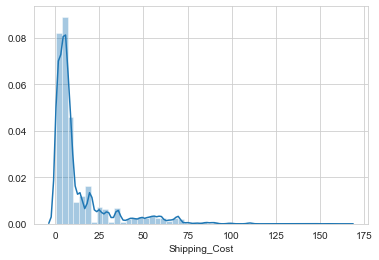

In [2]:
# simple density plot
sns.distplot(df['Shipping_Cost'])
plt.show()